# Problema 1

In [58]:
# The mean waiting time is (a + b)/2, where:

# The train arrives now (no wait)
a <- 0

# Maximum expected waiting time
b <- 100

mean.time <- (a + b)/2

# The standard deviation, on the other hand, 
# is given by: (b - a)/sqrt(12)

var.time <- (b - a)*(b - a)/12

print(paste("The mean waiting time is:", format(round(mean.time, 2), nsmall = 2),"minutes"))
print(paste("The variance is:", format(round(var.time, 2), nsmall = 2),"minutes^2"))
print(paste("The standard deviation is:", format(round(sqrt(var.time), 2), nsmall = 2),"minutes"))

[1] "The mean waiting time is: 50,00 minutes"
[1] "The variance is: 833,33 minutes^2"
[1] "The standard deviation is: 28,87 minutes"


In [63]:
# Simulate the waiting time of 30 people

# Fi the seed just to have every time the same result
set.seed(1)

# Simulate the 30 waiting times, using a uniform distribution
wait.time <- runif(30,0,100)

sample.mean.time = mean(wait.time)
print(paste("The mean waiting time for this sample is:", format(round(sample.mean.time, 2), nsmall = 2)))

sample.var.time <- var(wait.time)
print(paste("The variance for this sample is:", format(round(sample.var.time, 2), nsmall = 2)))

print(paste("The standard deviation for this sample is:", format(round(sqrt(sample.var.time), 2), nsmall = 2)))

[1] "The mean waiting time for this sample is: 50,96"
[1] "The variance for this sample is: 871,90"
[1] "The standard deviation for this sample is: 29,53"


The mean value of the sample is the same as the expected mean value. 
In our case, 50 minutes

The variance of the sample is related to the expected variance through the relation:

$var(X) = \frac{var(\bar{X})}{n}$

where n is the size of the sample

In [78]:
# Case n = 30
n <- 30
var.sample.30 <- var.time / n
print(paste("The variance for a sample of",n,"people is:", format(round(var.sample.30, 2), nsmall = 2)))

# Case n = 100
n <- 100
var.sample.100 <- var.time / n
print(paste("The variance for a sample of",n,"people is:", format(round(var.sample.100, 2), nsmall = 2)))

[1] "The variance for a sample of 30 people is: 27,78"
[1] "The variance for a sample of 100 people is: 8,33"


In [79]:
# Simulate 500 random samples of 30 people.

# A huge (30 x 500) matrix
mat.30 <- matrix(runif(30*500,0,100), ncol = 500)

# A vector storing the means of the 500 random samples
mean.vec.30 <- colMeans(mat.30)

# The mean of the 500 mean values
my.mean.30 <- mean(mean.vec.30)

# The variance of the 500 mean values
my.var.30 <- var(mean.vec.30)

print(paste("The mean extracted from 500 samples of 30 people is:", format(round(my.mean.30, 2), nsmall = 2)))
print(paste("The variance extracted from 500 samples of 30 people is:", format(round(my.var.30, 2), nsmall = 2)))

[1] "The mean extracted from 500 samples of 30 people is: 50,04"
[1] "The variance extracted from 500 samples of 30 people is: 29,49"


The mean value is, as we expected, ~50 in every case, since the mean value is always distributed around the expected value.

By simulating 500 samples of 30 people waiting for the train, we get a value of the variance very close to the one we expected for a sample of 30 people.

In [80]:
# Now do the same, but for samples of 100 people.

# Simulate 500 random samples of 100 people.

# A huge (100 x 500) matrix
mat.100 <- matrix(runif(100*500,0,100), ncol = 500)

# A vector storing the means of the 500 random samples
mean.vec.100 <- colMeans(mat.100)

# The mean of the 500 mean values
my.mean.100 <- mean(mean.vec.100)

# The variance of the 500 mean values
my.var.100 <- var(mean.vec.100)

print(paste("The mean extracted from 500 samples of 30 people is:", format(round(my.mean.100, 2), nsmall = 2)))
print(paste("The variance extracted from 500 samples of 30 people is:", format(round(my.var.100, 2), nsmall = 2)))

[1] "The mean extracted from 500 samples of 30 people is: 50,08"
[1] "The variance extracted from 500 samples of 30 people is: 7,65"


Also in this case, by simulating 500 samples of 100 people waiting for the train, we get a value of the variance very close to the one we expected for a sample of 100 people.

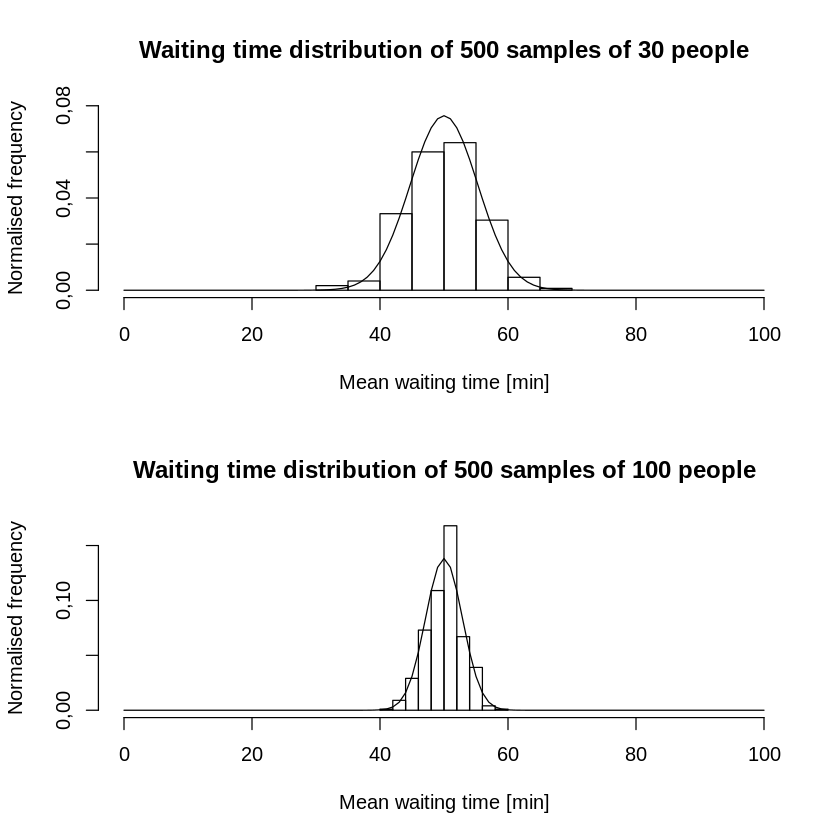

In [55]:
# Plot the 2 previous mean distributions in a 2-panel figure
# and superimpose the corresponding expected normal distribution.

# Prepare the 2-panel figure
par(mfrow=c(2,1)) 

# 30-people sample
hist(mean.vec.30, xlim = c(0,100), ylim = c(0,0.08),
     xlab="Mean waiting time [min]", ylab="Normalised frequency", 
     main="Waiting time distribution of 500 samples of 30 people",
     freq = F)
curve(dnorm(x,50,sqrt(var.sample.30)), from = 0, to = 100, add = TRUE)

# 100-people sample
hist(mean.vec.100, xlim = c(0,100),
     xlab="Mean waiting time [min]", ylab="Normalised frequency", 
     main="Waiting time distribution of 500 samples of 100 people",
     freq = F)

curve(dnorm(x,50,sqrt(var.sample.100)), from = 0, to = 100, add = TRUE)

The plots of the distributions related to the samples we generated agree very well with the expected p.d.f. in both cases.

In other words, the histogram representing the distribution of the 500 mean values of the waiting times for samples of 30 people agrees with a gaussian centered at 50 and with a standard deviation of $\sqrt{27.7}$.
Similarly, the histogram representing the distribution of the 500 mean values of the waiting times for samples of 100 people agrees with a gaussian centered at 50 and with a standard deviation of $\sqrt{8.33}$.

This means that by taking the mean value of n uniform distributions (with n large enough, in our case n = 500), we get a normal distribution with expected value corresponding to the expected value of the uniform distribution and variance equal to $\frac{var(uniform)}{n}$. 

So, we have empirically verified the central limit theorem in the specific case of uniform distributions.
